In [74]:
import numpy as np
from tensorflow import keras
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Dense,Flatten,Dropout,AvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [75]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
val=ImageDataGenerator(rescale=1/255)

In [78]:
train_dataset=train.flow_from_directory('/content/train',
                                        target_size=(128,128),                                   
                                        class_mode='binary',
                                        )
val_dataset=val.flow_from_directory('/content/drive/My Drive/head_ct/val',
                                        target_size=(128,128),                                       
                                       class_mode='binary',
                                        )
test_dataset=test.flow_from_directory('/content/drive/My Drive/head_ct/test',
                                        target_size=(128,128),                                       
                                       class_mode='binary',
                                        )


Found 2719 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [83]:
val_dataset.class_indices

{'negative': 0, 'positive': 1}

In [187]:
model=Sequential()
model.add(Conv2D(256,(1,1),input_shape=(128,128,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 128, 128, 256)     1024      
_________________________________________________________________
batch_normalization_18 (Batc (None, 128, 128, 256)     1024      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 64, 64, 256)       65792     
_________________________________________________________________
batch_normalization_19 (Batc (None, 64, 64, 256)       1024      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 256)      

In [188]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [227]:
history=model.fit(train_dataset,epochs=1,validation_data=val_dataset)

85/85 [==============================] - 17s 204ms/step - loss: 0.1608 - accuracy: 0.9772 - val_loss: 0.2641 - val_accuracy: 0.9583


In [228]:
model.evaluate(test_dataset)

2/2 [==============================] - 0s 16ms/step - loss: 0.3142 - accuracy: 0.9750


[0.3142003118991852, 0.9750000238418579]

In [238]:
img=image.load_img('/content/hem.jpg',target_size=(128,128))


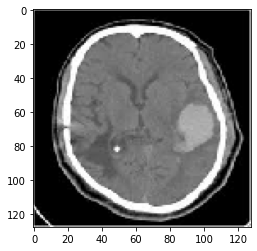

In [239]:
plt.imshow(img)

In [240]:
img1=image.img_to_array(img)
img1=img1/255

In [241]:
img1=np.expand_dims(img1,[0])

In [242]:
img1.shape

(1, 128, 128, 3)

In [243]:
pred=model.predict(img1)
if(pred[0]>=0.5):
  print('positive')
else:
  print('negative')

positive


In [244]:
pred

array([[0.82470614]], dtype=float32)